In [1]:
# 1. Import and preprocess the dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
housing = pd.read_csv(r"C:\Users\Ram Tharun\Downloads\Housing.csv")

In [5]:
print (housing.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [6]:
# Encode categorical variables
housing_encoded = pd.get_dummies(housing, drop_first=True)


In [7]:
# 2. Split data into train-test sets
X = housing_encoded.drop("price", axis=1)
y = housing_encoded["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# 3. Fit a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
# 4. Evaluate model using MAE, MSE, R²
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [10]:
print("Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")

Model Evaluation:
Mean Absolute Error (MAE): 970043.40
Mean Squared Error (MSE): 1754318687330.66
R² Score: 0.6529


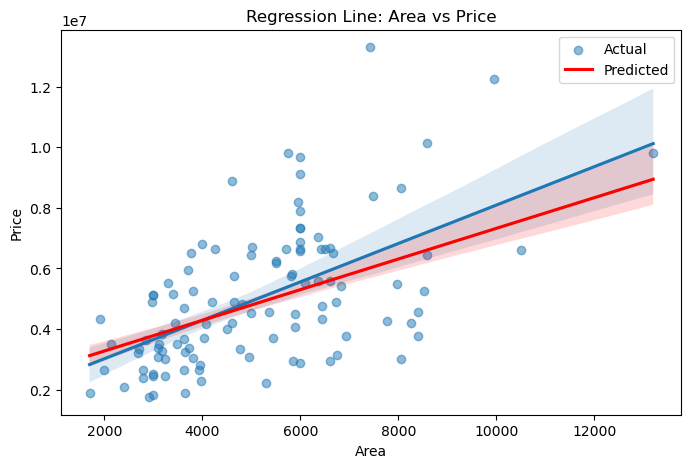

In [11]:
# 5. Plot regression line (for one feature, e.g., 'area')
plt.figure(figsize=(8, 5))
sns.regplot(x=X_test["area"], y=y_test, label="Actual", scatter_kws={"alpha":0.5})
sns.regplot(x=X_test["area"], y=y_pred, label="Predicted", scatter=False, color="red")
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Regression Line: Area vs Price")
plt.legend()
plt.show()

In [12]:
# Interpret Coefficients
coeff_housing = pd.DataFrame(model.coef_, X.columns, columns=["Coefficient"])
print("\nModel Coefficients:")
print(coeff_housing)


Model Coefficients:
                                  Coefficient
area                             2.359688e+02
bedrooms                         7.677870e+04
bathrooms                        1.094445e+06
stories                          4.074766e+05
parking                          2.248419e+05
mainroad_yes                     3.679199e+05
guestroom_yes                    2.316100e+05
basement_yes                     3.902512e+05
hotwaterheating_yes              6.846499e+05
airconditioning_yes              7.914267e+05
prefarea_yes                     6.298906e+05
furnishingstatus_semi-furnished -1.268818e+05
furnishingstatus_unfurnished    -4.136451e+05
